# Analysis of PFRs

In [212]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [177]:
plr = pd.read_csv('anova.csv', usecols=[1,2,3,4], header=0)

In [213]:
plr_mobile = pd.read_csv('anova_mobile.csv', usecols=[1,2,3,4], header=0)

In [180]:
plr

,AMP,CV,MCV,Class
0,2.33,3.35,5.71,1
1,2.19,3.22,4.99,1
2,2.14,3.44,4.81,1
3,1.29,2.87,3.79,1
4,2.88,3.76,6.06,1
5,0.94,1.38,2.18,2
6,1.16,1.44,2.46,2
7,1.32,2.24,3.34,2
8,0.93,2.49,3.68,2
9,0.78,1.54,2.28,2


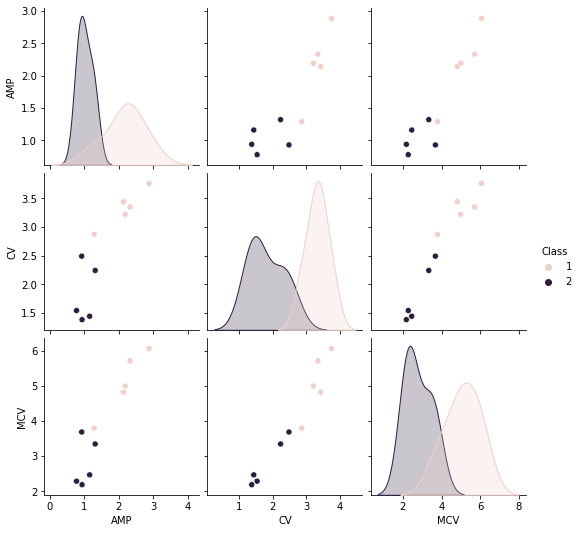

In [186]:
sns.pairplot(plr, hue='Class')

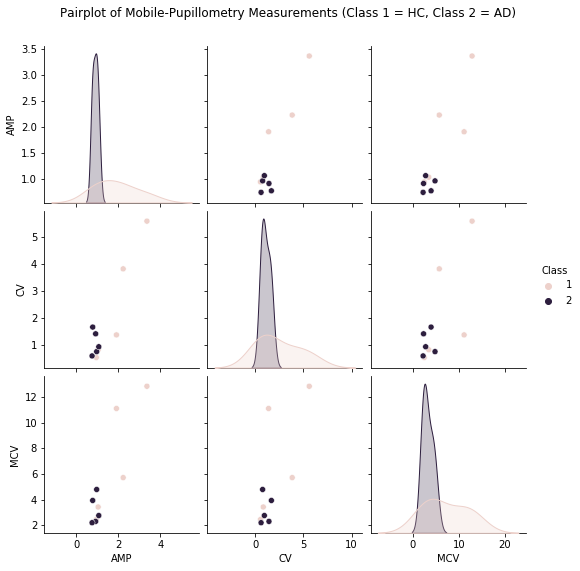

In [216]:
sns_plot = sns.pairplot(plr_mobile, hue='Class')
sns_plot.fig.suptitle("Pairplot of Mobile-Pupillometry Measurements (Class 1 = HC, Class 2 = AD)", y=1.05)
#fig = sns_plot.get_figure()
sns_plot.savefig("pairplots2.png")

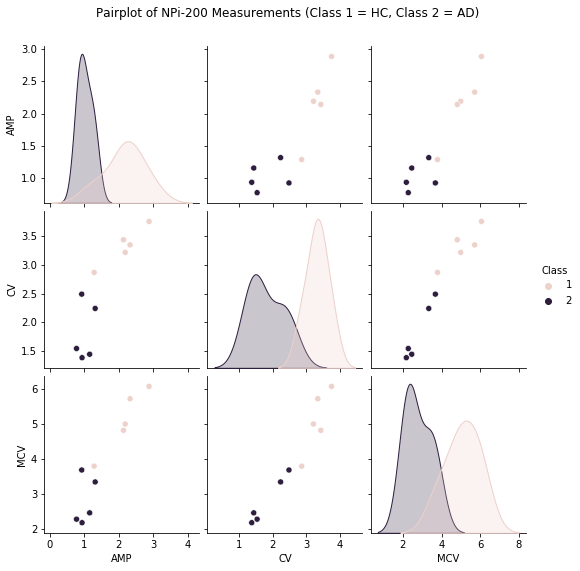

In [191]:
sns_plot = sns.pairplot(plr, hue='Class')
sns_plot.fig.suptitle("Pairplot of NPi-200 Measurements (Class 1 = HC, Class 2 = AD)", y=1.05)
#fig = sns_plot.get_figure()
sns_plot.savefig("pairplots.png")

In [192]:
#perform three-way ANOVA
model = ols("""Class ~ C(AMP) + C(CV) + C(MCV) +
               C(AMP):C(CV) + C(CV):C(MCV) + C(MCV):C(AMP) +
               C(AMP):C(CV):C(MCV)""", data=plr).fit()

#sm.stats.anova_lm(model, typ=2)

In [195]:
# SciPy v1.7.1
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=plr[['AMP']].iloc[:5], y=plr[['AMP']].iloc[5:])

MannwhitneyuResult(statistic=array([24.]), pvalue=array([0.01587302]))

In [208]:
# SciPy v1.7.1
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
a = stats.mannwhitneyu(x=plr[['AMP']].iloc[:5], y=plr[['AMP']].iloc[5:])

In [209]:
b = stats.mannwhitneyu(x=plr[['CV']].iloc[:5], y=plr[['CV']].iloc[5:])

In [210]:
c = stats.mannwhitneyu(x=plr[['MCV']].iloc[:5], y=plr[['MCV']].iloc[5:])

In [211]:
print(a, b, c)

MannwhitneyuResult(statistic=array([24.]), pvalue=array([0.01587302])) MannwhitneyuResult(statistic=array([25.]), pvalue=array([0.00793651])) MannwhitneyuResult(statistic=array([25.]), pvalue=array([0.00793651]))


In [204]:
plr[['MCV']].iloc[5:]

,MCV
5,2.18
6,2.46
7,3.34
8,3.68
9,2.28
